In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(df_train.shape,df_test.shape)

(891, 12) (418, 11)


In [5]:
df_train.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1,inplace = True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [6]:
PassengerId = df_test['PassengerId']
df_test.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1,inplace = True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [7]:
PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [8]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
df_train['Sex'] = [1 if value == 'male' else 0 for value in df_train['Sex']]
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [10]:
def Null_count(data):
    for feature in data:
        print(feature,' Null value count = ',data[feature].isnull().sum())

In [11]:
Null_count(df_train)

Survived  Null value count =  0
Pclass  Null value count =  0
Sex  Null value count =  0
Age  Null value count =  177
SibSp  Null value count =  0
Parch  Null value count =  0
Embarked  Null value count =  2


In [12]:
df_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='Count'>

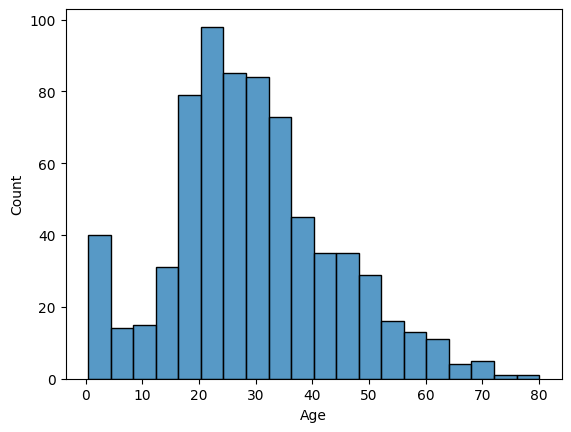

In [13]:
sns.histplot(df_train['Age'])

In [14]:
age_mean = int(df_train['Age'].mean())
df_train['Age'].fillna(age_mean,inplace=True)

In [15]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
df_train['Embarked'].fillna('U',inplace=True)

In [17]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', 'U'], dtype=object)

In [18]:
Null_count(df_train)

Survived  Null value count =  0
Pclass  Null value count =  0
Sex  Null value count =  0
Age  Null value count =  0
SibSp  Null value count =  0
Parch  Null value count =  0
Embarked  Null value count =  0


In [19]:
Null_count(df_test)

Pclass  Null value count =  0
Sex  Null value count =  0
Age  Null value count =  86
SibSp  Null value count =  0
Parch  Null value count =  0
Embarked  Null value count =  0


In [20]:
df_test['Age'].mean()

30.272590361445783

In [21]:
df_test['Age'].value_counts()

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

In [22]:
df_test['Age'].median()

27.0

In [23]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)
Null_count(df_test)

Pclass  Null value count =  0
Sex  Null value count =  0
Age  Null value count =  0
SibSp  Null value count =  0
Parch  Null value count =  0
Embarked  Null value count =  0


In [24]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', 'U'], dtype=object)

In [25]:
df_train = pd.get_dummies(df_train,columns=['Embarked'],drop_first=True)

In [26]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Embarked_U
0,0,3,1,22.0,1,0,0,1,0
1,1,1,0,38.0,1,0,0,0,0
2,1,3,0,26.0,0,0,0,1,0
3,1,1,0,35.0,1,0,0,1,0
4,0,3,1,35.0,0,0,0,1,0


In [27]:
df_train.nunique()

Survived       2
Pclass         3
Sex            2
Age           88
SibSp          7
Parch          7
Embarked_Q     2
Embarked_S     2
Embarked_U     2
dtype: int64

In [28]:
df_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [29]:
df_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

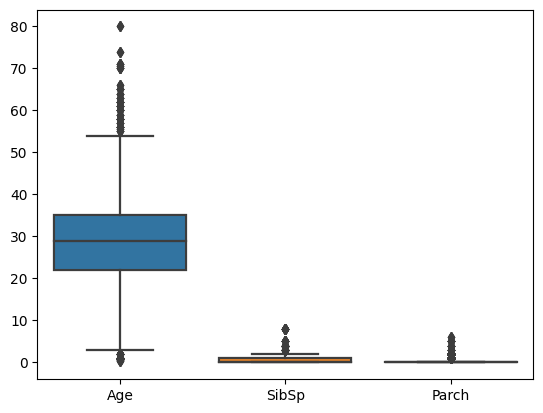

In [30]:
out = df_train[['Age','SibSp','Parch']]
for feature in out:
    sns.boxplot(out)

<AxesSubplot: >

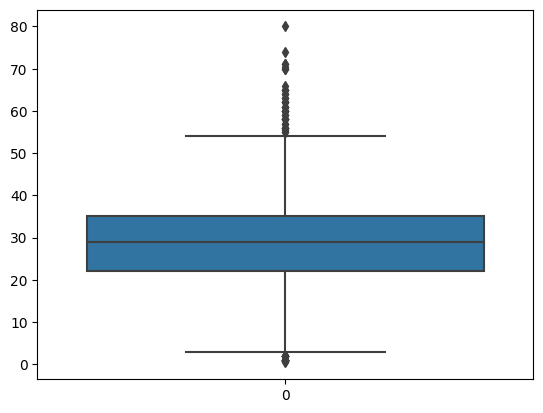

In [31]:
sns.boxplot(df_train['Age'])

C:\Users\thala\AppData\Local\Temp\ipykernel_13972\1707602906.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

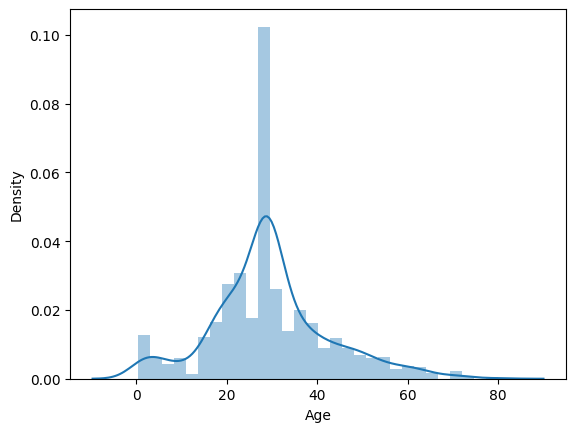

In [32]:
sns.distplot(df_train['Age'])

In [33]:
percentile25 = df_train['Age'].quantile(0.25)
percentile75 = df_train['Age'].quantile(0.75)
print(percentile25,percentile75)

22.0 35.0


In [34]:
iqr = percentile75 - percentile25
iqr

13.0

In [35]:
upper_limit = int(percentile75 + 1.5*iqr)
lower_limit = int(percentile25 - 1.5*iqr)
print(upper_limit,lower_limit)

54 2


In [36]:
df_train['Age'] = np.where(df_train['Age']>upper_limit,
                           upper_limit,
                          np.where(df_train['Age']<lower_limit,
                                   lower_limit,
                                   df_train['Age']))

<AxesSubplot: >

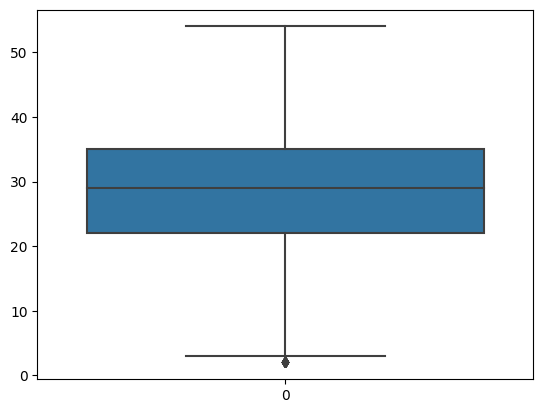

In [37]:
sns.boxplot(df_train['Age'])

C:\Users\thala\AppData\Local\Temp\ipykernel_13972\1707602906.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

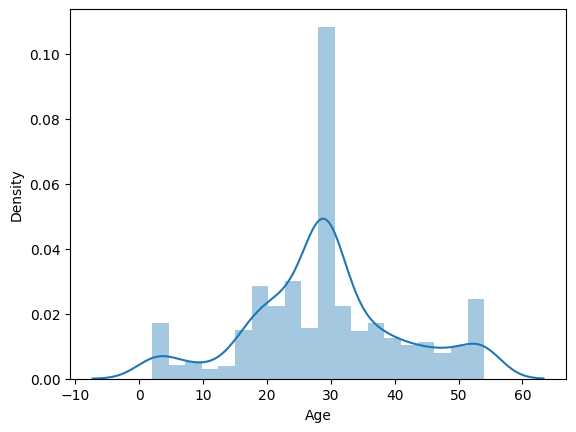

In [38]:
sns.distplot(df_train['Age'])

In [39]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Embarked_U
0,0,3,1,22.0,1,0,0,1,0
1,1,1,0,38.0,1,0,0,0,0
2,1,3,0,26.0,0,0,0,1,0
3,1,1,0,35.0,1,0,0,1,0
4,0,3,1,35.0,0,0,0,1,0


In [40]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [41]:
df_test['Sex'] = [1 if value == 'male' else 0 for value in df_test['Sex']]
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,Q
1,3,0,47.0,1,0,S
2,2,1,62.0,0,0,Q
3,3,1,27.0,0,0,S
4,3,0,22.0,1,1,S


In [42]:
Null_count(df_test)

Pclass  Null value count =  0
Sex  Null value count =  0
Age  Null value count =  0
SibSp  Null value count =  0
Parch  Null value count =  0
Embarked  Null value count =  0


In [43]:
df_test = pd.get_dummies(df_test,columns=['Embarked'],drop_first=True)

In [44]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,1,0
1,3,0,47.0,1,0,0,1
2,2,1,62.0,0,0,1,0
3,3,1,27.0,0,0,0,1
4,3,0,22.0,1,1,0,1


In [45]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Embarked_U
0,0,3,1,22.0,1,0,0,1,0
1,1,1,0,38.0,1,0,0,0,0
2,1,3,0,26.0,0,0,0,1,0
3,1,1,0,35.0,1,0,0,1,0
4,0,3,1,35.0,0,0,0,1,0


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df_train.drop('Survived',axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model_tree = DecisionTreeClassifier()

In [50]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
d_y_pred = model_tree.predict(X_test)

In [52]:
from sklearn import metrics

In [54]:
print("The model accuracy is ",metrics.accuracy_score(d_y_pred,y_test))

The model accuracy is  0.752542372881356


In [57]:
print(metrics.classification_report(d_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       190
           1       0.63      0.72      0.68       105

    accuracy                           0.75       295
   macro avg       0.73      0.75      0.74       295
weighted avg       0.76      0.75      0.76       295



In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
model_random = RandomForestClassifier()

In [60]:
model_random.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
r_y_pred =model_random.predict(X_test)

In [62]:
print("The model accuracy is ",metrics.accuracy_score(r_y_pred,y_test))
print(metrics.classification_report(r_y_pred,y_test))

The model accuracy is  0.7864406779661017
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       180
           1       0.72      0.75      0.73       115

    accuracy                           0.79       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
l_model = LogisticRegression()

In [65]:
l_model.fit(X_train,y_train)

LogisticRegression()

In [66]:
l_y_pred = l_model.predict(X_test)

In [67]:
print("The model accuracy is ",metrics.accuracy_score(l_y_pred,y_test))
print(metrics.classification_report(l_y_pred,y_test))

The model accuracy is  0.8169491525423729
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       185
           1       0.73      0.80      0.77       110

    accuracy                           0.82       295
   macro avg       0.80      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
l = []
for i in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    l.append(metrics.accuracy_score(knn_model.predict(X_test),y_test))

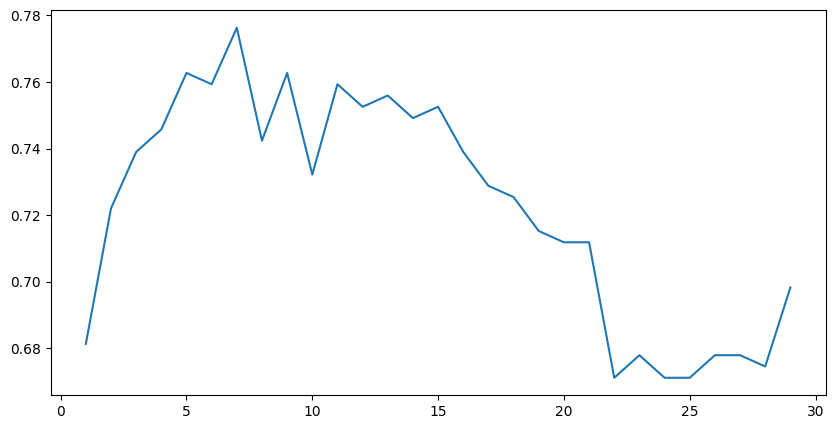

In [70]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30),l)
plt.show()

In [71]:
for i,j in zip(range(1,30),l):
    print(i,"=",j)

1 = 0.6813559322033899
2 = 0.7220338983050848
3 = 0.7389830508474576
4 = 0.7457627118644068
5 = 0.7627118644067796
6 = 0.7593220338983051
7 = 0.7762711864406779
8 = 0.7423728813559322
9 = 0.7627118644067796
10 = 0.7322033898305085
11 = 0.7593220338983051
12 = 0.752542372881356
13 = 0.7559322033898305
14 = 0.7491525423728813
15 = 0.752542372881356
16 = 0.7389830508474576
17 = 0.7288135593220338
18 = 0.7254237288135593
19 = 0.7152542372881356
20 = 0.711864406779661
21 = 0.711864406779661
22 = 0.6711864406779661
23 = 0.6779661016949152
24 = 0.6711864406779661
25 = 0.6711864406779661
26 = 0.6779661016949152
27 = 0.6779661016949152
28 = 0.6745762711864407
29 = 0.6983050847457627


In [72]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,1,0
1,3,0,47.0,1,0,0,1
2,2,1,62.0,0,0,1,0
3,3,1,27.0,0,0,0,1
4,3,0,22.0,1,1,0,1


In [73]:
df_test['Embarked_U'] = 0
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Embarked_U
0,3,1,34.5,0,0,1,0,0
1,3,0,47.0,1,0,0,1,0
2,2,1,62.0,0,0,1,0,0
3,3,1,27.0,0,0,0,1,0
4,3,0,22.0,1,1,0,1,0


In [87]:
output = l_model.predict(df_test)

In [88]:
print(len(output))
print(len(PassengerId))
X_test.shape

418
418


(295, 8)

In [89]:
df = pd.DataFrame({'PassengerId':PassengerId.values,
                 'Survived':output})

In [90]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [91]:
df.to_csv('gender_submission.csv',index=False)